In [1]:
using SeisNoise, SeisIO, Plots
using Dates 
d=load_corr("/data/wsd01/corrdata/200lag/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2","ZZ")
dailystk=stack(d,interval=Day(1))
allstk=stack(d,allstack=true)
allstk1 = deepcopy(allstk)
allstk2 = deepcopy(allstk)
allstk3 = deepcopy(allstk)
dailystk1 = deepcopy(dailystk)
dailystk2 = deepcopy(dailystk)
dailystk3 = deepcopy(dailystk)

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/jupyter_share/.julia/packages/Plots/GGa6i/src/backends/hdf5.jl", 36, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f0f4c186c7f, Ptr{Nothing} @0x00007f0f4c2195cc, Ptr{Nothing} @0x00007f0f4c219b35, Ptr{Nothing} @0x00007f0f4c21980e, Ptr{Nothing} @0x00007f0f4c21a451, Ptr{Nothing} @0x00007f0f4c21aed7, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f0f4c2367b1, Ptr{Nothing} @0x00007f0f4c236ee3, Ptr{Nothing} @0x00007f0f4c2369fc, Ptr{Nothing} @0x00007f0f4c2369fc, Ptr{Nothing} @0x00007f0f4c2385c9, Ptr{Nothing} @0x00007f0f315da307, Ptr{Nothing} @0x00007f0f4c1fd2b9, Ptr{Nothing} @0x00007f0f314e1582, Ptr{Nothing} @0x00007f0f3124b695, Ptr{Nothing} @0x00007f0f4c1fd2b9, Ptr{Nothing} @0x00007f0f4c20e096, Ptr{Nothing} @0x00007f0f2a93a3be, Ptr{Nothing} @0x00007f0f4c1fd2b9, Ptr{Nothing} @0x00007f0f4c219b55, Ptr{Nothing} @0x00

CorrData with 1958 Corrs
      NAME: "OO.HYS14..BHZ.OO.HYSB1..BHZ"      
        ID: "2015-01-01"                       
       LOC: 0.0 N, 0.0 E, 0.0 m
      COMP: "ZZ"                               
   ROTATED: false                              
 CORR_TYPE: "CC"                               
        FS: 40.0
      GAIN: 1.0
   FREQMIN: 0.01
   FREQMAX: 16.0
    CC_LEN: 1800.0
   CC_STEP: 450.0
  WHITENED: true                               
 TIME_NORM: ""                                 
      RESP: a0 1.0, f0 1.0, 0z, 0p
      MISC: 0 entries                          
     NOTES: 7 entries                          
      DIST: 0.0
       AZI: 0.0
       BAZ: 0.0
    MAXLAG: 200.0
         T: 2015-01-01T00:00:00                …
      CORR: 16001×1958 Matrix{Float32}         


In [ ]:
plot(allstk)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_raw_allstack.pdf")

In [ ]:
clean_up!(allstk1,0.1,0.2)
abs_max!(allstk1)
AS1=[allstk1.corr]
plot(allstk1)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_0.1_0.2_allstack.pdf")

In [ ]:
clean_up!(allstk2,0.2,1)
abs_max!(allstk2)
AS2=allstk2.corr
plot(allstk2)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_0.2_0.1_allstack.pdf")

In [ ]:
clean_up!(allstk3,1.0,5.0)
abs_max!(allstk3)
AS3=allstk3.corr
plot(allstk3)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_1_5.pdf")

In [ ]:
plot(AS1, label = "0.1-0.2")
plot!(AS2, label = "0.2-0.5")
plot!(AS3, label = "0.5-1.0")
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_all stack filtered waveforms.pdf")

In [ ]:
clean_up!(dailystk1,0.1,0.2)
abs_max!(dailystk1)
DS1=dailystk1
plot(dailystk1)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_0.1_0.2_daily.pdf")

In [ ]:
clean_up!(dailystk2,0.2,1.0)
abs_max!(dailystk2)
DS2=dailystk2
plot(dailystk2)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_0.2_0.1_daily.pdf")

In [ ]:
clean_up!(dailystk3,1.0,5.0)
abs_max!(dailystk3)
DS3=dailystk3
plot(dailystk3)#xlim=[2,6],legend=true)
#plot!(size=(1000,1000))
#savefig("HYS14_HYS14_1_5_daily.pdf")

In [ ]:
plot(dailystk3, xlim=[2,6])

In [ ]:
using Statistics

lag_start = 2
lag_end = 6
c1=Vector()
for i =1:1975
    insert!(c1,i,cor(AS3[:][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)],DS3.corr[:,i][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)]))
end


In [ ]:
using Statistics

lag_start = 11
lag_end = 16
c2=Vector()
for i =1:1975
    insert!(c2,i,cor(AS2[:][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)],DS2.corr[:,i][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)]))
end

In [ ]:
r=map(unix2datetime,dailystk.t)
plot(r, c1, label="cc: 2 to 6", legend=:bottomleft)

#plot!(c2, label="11 to 16", legend=:bottomleft)

In [ ]:
lag_start = -60
lag_end = -40
c2=Vector()
for i =1:1975
    insert!(c2,i,cor(AS2[:][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)],DS2.corr[:,i][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)]))
end


In [ ]:
lag_start = -60
lag_end = -40
c3=Vector()
for i =1:1975
    insert!(c3,i,cor(AS1[1][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)],DS3.corr[:,i][(Int(floor(lag_start*40))+2401):(Int(floor(lag_end*40))+2401)]))
end


In [ ]:
plot(c1)
plot!(c2)
plot!(c3)

In [2]:
    function evenly_spaced(a, b, n)
        h = (b-a)/(n-1)
        collect(a:h:b)
    end

evenly_spaced (generic function with 1 method)

In [3]:
using SeisDvv
fs=40.0 # sample frequency
j=length(dailystk.corr[1,:])
dvt=zeros(j)
cct=zeros(j)
tmin = 60.0
tmax = 100.0
fmin = 0.1
fmax = 0.2
window = collect(range(Int(floor(tmin*fs))+2401,Int(floor(tmax*fs))+2401,step=1))
time=evenly_spaced(-200,200,length(allstk.corr[:]))
clean_up!(allstk,fmin,fmax)
clean_up!(dailystk,fmin,fmax)
abs_max!(allstk)
abs_max!(dailystk)

for i in 1:j
    S1=Array(allstk.corr[:])
    S2=Array(dailystk.corr[:,i]) 
    
    dvv_ts, cc_ts, cdp_Ts, eps_ts, err_ts, allC_ts = SeisDvv.stretching(S1, S2, time, window, fmin, fmax,ntrial=100);
    dvt[i]=dvv_ts
    cct[i]=cc_ts
    
end

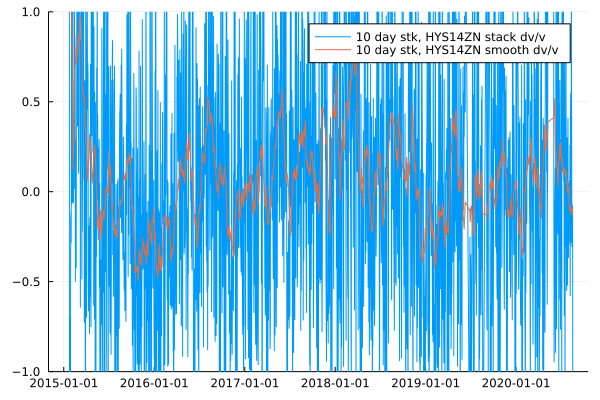

In [4]:
using Dates

r=map(unix2datetime,dailystk.t)

plot(r,dvt,seriestype = :line, ylim =[-1,1],label = "10 day stk, HYS14ZN stack dv/v")
plot!(r, smooth(dvt,15),label="10 day stk, HYS14ZN smooth dv/v")

In [ ]:
#using MarketTechnicals
#a=sma(dvt, 30)
plot(smooth(dvt,15),ylim =[-1,1], label = "60 to 100" )

In [ ]:
dvt

In [ ]:
using MarketTechnicals
a=sma(dvt, 10)
plot(a, ylim=[-0.1,0.1])